In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [90]:
df1=pd.read_csv('/Users/qianj/Documents/Kaggle_Competition/PlayGround/Binary Classification with a Bank Churn Dataset/train.csv').drop('Surname',axis=1)
y=df1[['Exited']]
df1=df1.drop('Exited',axis=1)
df2=pd.read_csv('/Users/qianj/Documents/Kaggle_Competition/PlayGround/Binary Classification with a Bank Churn Dataset/test.csv').drop('Surname',axis=1)

In [49]:
df1_dummy=pd.get_dummies(df1)
df2_dummy=pd.get_dummies(df2)

In [50]:
df1_dummy_scaled=MinMaxScaler().fit_transform(df1_dummy)
df2_dummy_scaled=MinMaxScaler().fit_transform(df2_dummy)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(df1_dummy_scaled,y,test_size=0.2,random_state=42)

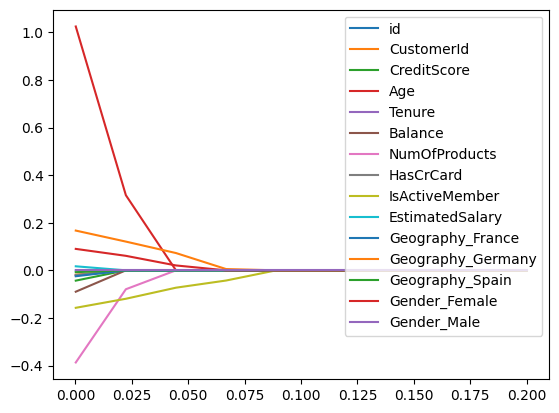

In [64]:
A=np.linspace(0.0001,0.1,10)
coefs=[]

for a in A:
    model=SGDRegressor(penalty='l1',alpha=a)
    model.fit(X_train,np.ravel(y_train))
    coefs.append(model.coef_)

ax=plt.gca()
ax=plt.plot(A*2,coefs)
plt.legend(df1_dummy.columns,loc='upper right')

In [66]:
df1_dummy_selected=df1_dummy[['Age','Geography_Germany','Gender_Female','NumOfProducts','IsActiveMember']]
df2_dummy_selected=df2_dummy[['Age','Geography_Germany','Gender_Female','NumOfProducts','IsActiveMember']]

In [80]:
df1_selected_scaled=MinMaxScaler().fit_transform(df1_dummy_selected)
df2_selected_scaled=MinMaxScaler().fit_transform(df2_dummy_selected)

In [68]:
X_selected_train,X_selected_test,y_train,y_test=train_test_split(df1_selected_scaled,y)

In [74]:
rfc = RandomForestRegressor()
rfc.fit(X_selected_train,np.ravel(y_train))

RandomForestRegressor()

In [77]:
roc_auc_score(y_test,rfc.predict(X_selected_test))

np.float64(0.8754910822375073)

In [79]:
rfc.fit(df1_selected_scaled,np.ravel(y))

RandomForestRegressor()

In [82]:
yhat=rfc.predict(df2_selected_scaled)

In [101]:
def file(yhat):
    yhat = pd.DataFrame({'Exited':yhat})
    result = df2.join(yhat)
    result[['id','Exited']].to_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Binary Classification with a Bank Churn Dataset/result.csv",index=False)
    return
file(yhat)